# Цель исследования

Цель данного исследования — провести анализ данных о продажах на маркетплейсе Amazon за 2020 год, чтобы выявить ключевые тенденции, закономерности и факторы, влияющие на продажи.

# Загрузка и предобработка

## Загрузка

Данные взяты с сайта kaggle
[данные о продажах маркетплейса Amazon](https://www.kaggle.com/datasets/ammaraahmad/us-ecommerce-record-2020)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Импорты и настройки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
import plotly.express as px
import matplotlib.ticker as mtick
import matplotlib
warnings.filterwarnings('ignore')

In [ ]:
df_primary = pd.read_csv('/content/drive/MyDrive/Zerocode/PN14/amazon_market_data.csv')

In [ ]:
df_primary

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,30-12-20,908,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
3308,30-12-20,909,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
3309,30-12-20,1297,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188
3310,30-12-20,1298,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750


## Приведение столбцов к стилю camel_case

In [ ]:
def to_camel_case(snake_case_string):
    """Преобразует строку в snake_case в camelCase."""
    components = snake_case_string.split('_')
    # Делаем первую букву каждого слова, кроме первого, заглавной
    return components[0] + ''.join(x.title() for x in components[1:])

def rename_columns_to_camel_case(df_primary):
    """Переименовывает столбцы DataFrame в camelCase."""
    new_columns = {col: to_camel_case(col) for col in df_primary.columns}
    return df_primary.rename(columns=new_columns)

# Заменим пробелы, скобки и дефисы в названиях столбцов на подчеркивания, чтобы их можно было правильно конвертировать в camelCase
df_primary.columns = df_primary.columns.str.replace(' ', '_')
df_primary.columns = df_primary.columns.str.replace(r'[\(\)]', '', regex=True)
df_primary.columns = df_primary.columns.str.replace('-', '_')

# Применим функцию переименования
df_camel_case = rename_columns_to_camel_case(df_primary)

#Сделаем первую букву каждого столбца строчной в df_camel_case
df_camel_case.columns = [col[0].lower() + col[1:] if len(col) > 0 else col for col in df_camel_case.columns]

# Выведем DataFrame с новыми названиями столбцов
print(df_camel_case.columns)

Index(['orderDate', 'rowId', 'orderId', 'shipMode', 'customerId', 'segment',
       'country', 'city', 'state', 'postalCode', 'region', 'productId',
       'category', 'subCategory', 'productName', 'sales', 'quantity',
       'discount', 'profit'],
      dtype='object')


In [ ]:
df = df_camel_case

## Приведение типов данных

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   orderDate    3312 non-null   object 
 1   rowId        3312 non-null   int64  
 2   orderId      3312 non-null   object 
 3   shipMode     3312 non-null   object 
 4   customerId   3312 non-null   object 
 5   segment      3312 non-null   object 
 6   country      3312 non-null   object 
 7   city         3312 non-null   object 
 8   state        3312 non-null   object 
 9   postalCode   3312 non-null   int64  
 10  region       3312 non-null   object 
 11  productId    3312 non-null   object 
 12  category     3312 non-null   object 
 13  subCategory  3312 non-null   object 
 14  productName  3312 non-null   object 
 15  sales        3312 non-null   float64
 16  quantity     3312 non-null   int64  
 17  discount     3312 non-null   float64
 18  profit       3312 non-null   float64
dtypes: flo

Значения в столбце orderDate нужно конвертировать в формат datetime.

In [ ]:
# Преобразуем столбец 'orderDate' в формат даты и времени.
# errors='coerce' заменяет любые значения, которые не могут быть преобразованы, на NaT (Not a Time).
# dayfirst=True указывает, что при парсинге даты сначала идет день (например, 01-12-2020 будет 1 декабря 2020).
df['orderDate'] = pd.to_datetime(df['orderDate'], dayfirst=True, errors='coerce')

# Проверяем тип данных столбца 'orderDate' после преобразования
print(df[['orderDate']].dtypes)

# Считаем количество пропущенных значений (NaT) в столбце 'orderDate'
print('Количество пропущенных дат (NaT):', df['orderDate'].isna().sum())

orderDate    datetime64[ns]
dtype: object
Количество пропущенных дат (NaT): 0


## Поиск дублей и пропусков в данных

In [ ]:
# Проверяем уникальные значения и нормализуем регистр/пробелы
cat_cols = ['shipMode','segment','country','city','state','region','category','subCategory']
for c in cat_cols:
    if c in df.columns:
        # Удаляем пробелы в начале и конце строки
        df[c] = df[c].astype(str).str.strip()
        df[c] = df[c].replace({'nan': np.nan})  # если как строка
        # привести к Title case для читаемости
        df[c] = df[c].str.title()
        print(c, ':', df[c].nunique(), 'пример:', df[c].unique()[:10])

shipMode : 4 пример: ['Standard Class' 'First Class' 'Second Class' 'Same Day']
segment : 3 пример: ['Consumer' 'Home Office' 'Corporate']
country : 1 пример: ['United States']
city : 350 пример: ['Lorain' 'Los Angeles' 'Franklin' 'Huntsville' 'Jacksonville' 'El Paso'
 'Rancho Cucamonga' 'San Francisco' 'Tuscaloosa' 'Detroit']
state : 47 пример: ['Ohio' 'California' 'Wisconsin' 'Texas' 'North Carolina' 'Alabama'
 'Michigan' 'Florida' 'Washington' 'Pennsylvania']
region : 4 пример: ['East' 'West' 'Central' 'South']
category : 3 пример: ['Furniture' 'Office Supplies' 'Technology']
subCategory : 17 пример: ['Furnishings' 'Binders' 'Storage' 'Chairs' 'Art' 'Appliances' 'Machines'
 'Tables' 'Accessories' 'Paper']


In [ ]:
# Поиск полных дубликатов строк
duplicate_rows = df.duplicated().sum()

# Вывод количества полных дубликатов
print(f"Количество полных дубликатов строк: {duplicate_rows}")

# Поиск пропущенных значений в каждом столбце
missing_values = df.isnull().sum()

# Вывод количества пропущенных значений по столбцам
print("\nКоличество пропущенных значений по столбцам:")
print(missing_values)

Количество полных дубликатов строк: 0

Количество пропущенных значений по столбцам:
orderDate      0
rowId          0
orderId        0
shipMode       0
customerId     0
segment        0
country        0
city           0
state          0
postalCode     0
region         0
productId      0
category       0
subCategory    0
productName    0
sales          0
quantity       0
discount       0
profit         0
dtype: int64


In [ ]:
# Проверка отрицательных или нулевых продаж/количеств
print("\nСтроки с отрицательными или нулевыми продажами/количествами:")
display(df[(df['sales'] <= 0) | (df['quantity'] <= 0)].head())

# Проверка аномально больших значений sales (outliers)
print("\nОписание столбца sales:")
display(df['sales'].describe())

# Выведем строки с самыми большими значениями sales
print("\nСтроки с самыми большими значениями sales:")
display(df.nlargest(5, 'sales'))


Строки с отрицательными или нулевыми продажами/количествами:


,orderDate,rowId,orderId,shipMode,customerId,segment,country,city,state,postalCode,...,productId,category,subCategory,productName,sales,quantity,discount,profit,city_state,orderMonth



Описание столбца sales:


,sales
count,3312.000000
mean,221.381418
std,585.257531
min,0.444000
25%,17.018000
50%,53.810000
75%,205.105700
max,13999.960000



Строки с самыми большими значениями sales:


,orderDate,rowId,orderId,shipMode,customerId,segment,country,city,state,postalCode,...,productId,category,subCategory,productName,sales,quantity,discount,profit,city_state,orderMonth
427,2020-03-23,8154,CA-2017-140151,First Class,RB-19360,Consumer,United States,Seattle,Washington,98115,...,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808,Seattle (Washington),2020-03
2302,2020-10-22,2624,CA-2017-127180,First Class,TA-21385,Home Office,United States,New York City,New York,10024,...,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888,New York City (New York),2020-10
2644,2020-11-17,4191,CA-2017-166709,Standard Class,HL-15040,Consumer,United States,Newark,Delaware,19711,...,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856,Newark (Delaware),2020-11
2443,2020-11-04,684,US-2017-168116,Same Day,GT-14635,Corporate,United States,Burlington,North Carolina,27217,...,TEC-MA-10004125,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.980,4,0.5,-3839.9904,Burlington (North Carolina),2020-11
66,2020-01-16,6521,CA-2017-138289,Second Class,AR-10540,Consumer,United States,Jackson,Michigan,49201,...,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,5443.960,4,0.0,2504.2216,Jackson (Michigan),2020-01


**Выводы по проверке данных:**

* **Пропущенные значения:** В столбце `orderDate` после преобразования типа данных и в остальных столбцах пропущенные значения отсутствуют.
* **Отрицательные или нулевые значения:** В столбцах `sales` и `quantity` нет отрицательных или нулевых значений, что указывает на корректность данных о продажах и количестве товаров в заказах.
* **Дубликаты:** Полные дубликаты строк в наборе данных отсутствуют.
* **Большие значения:** Присутствуют большие значения в столбце `sales`, что видно из описательной статистики и вывода топ-10 самых больших продаж. Эти значения, вероятно, соответствуют продажам дорогостоящих товаров (например, копировальных аппаратов и машин), и хотя они значительно выше среднего, они не являются ошибочными данными, а отражают реальные крупные сделки. Они могут влиять на средние показатели, но не искажают общую картину распределения продаж по категориям и подкатегориям.

## Создаем ячейки со словарями переводов:
`region_translation`, `state_translation`, `city_translation`, `category_translation` и `subcategory_translation`.


In [ ]:
subcategory_translation = {
    'Phones': 'Телефоны',
    'Chairs': 'Стулья',
    'Binders': 'Папки',
    'Storage': 'Хранение',
    'Tables': 'Столы',
    'Machines': 'Машины',
    'Accessories': 'Аксессуары',
    'Copiers': 'Копиры',
    'Bookcases': 'Книжные шкафы',
    'Supplies': 'Принадлежности',
    'Art': 'Искусство',
    'Appliances': 'Приборы',
    'Paper': 'Бумага',
    'Furnishings': 'Предметы интерьера',
    'Envelopes': 'Конверты',
    'Fasteners': 'Крепеж',
    'Labels': 'Наклейки'
}

In [ ]:
region_translation = {
    'West': 'Запад',
    'East': 'Восток',
    'Central': 'Центр',
    'South': 'Юг'
}

In [ ]:
state_translation = {
    'California': 'Калифорния',
    'New York': 'Нью-Йорк',
    'Texas': 'Техас',
    'Illinois': 'Иллинойс',
    'Pennsylvania': 'Пенсильвания',
    'Washington': 'Вашингтон',
    'Ohio': 'Огайо',
    'Florida': 'Флорида',
    'North Carolina': 'Северная Каролина',
    'Tennessee': 'Теннесси',
    'Michigan': 'Мичиган',
    'Arizona': 'Аризона',
    'Georgia': 'Джорджия',
    'Indiana': 'Индиана',
    'Colorado': 'Колорадо',
    'Virginia': 'Вирджиния',
    'Kentucky': 'Кентукки',
    'Massachusetts': 'Массачусетс',
    'New Jersey': 'Нью-Джерси',
    'Minnesota': 'Миннесота',
    'Maryland': 'Мэриленд',
    'Connecticut': 'Коннектикут',
    'Wisconsin': 'Висконсин',
    'Oregon': 'Орегон',
    'Oklahoma': 'Оклахома',
    'Alabama': 'Алабама',
    'Rhode Island': 'Род-Айленд',
    'Missouri': 'Миссури',
    'New Mexico': 'Нью-Мексико',
    'Nebraska': 'Небраска',
    'Delaware': 'Делавэр',
    'Arkansas': 'Арканзас',
    'Louisiana': 'Луизиана',
    'Utah': 'Юта',
    'Iowa': 'Айова',
    'Mississippi': 'Миссисипи',
    'South Carolina': 'Южная Каролина',
    'New Hampshire': 'Нью-Гэмпшир',
    'Idaho': 'Айдахо',
    'Nevada': 'Невада',
    'Kansas': 'Канзас',
    'South Dakota': 'Южная Дакота',
    'Montana': 'Монтана',
    'Vermont': 'Вермонт',
    'North Dakota': 'Северная Дакота',
    'West Virginia': 'Западная Вирджиния',
    'District Of Columbia': 'Округ Колумбия'
}

In [ ]:
city_translation = {
    'New York City (New York)': 'Нью-Йорк (Нью-Йорк)',
    'Los Angeles (California)': 'Лос-Анджелес (Калифорния)',
    'San Francisco (California)': 'Сан-Франциско (Калифорния)',
    'Philadelphia (Pennsylvania)': 'Филадельфия (Пенсильвания)',
    'Seattle (Washington)': 'Сиэтл (Вашингтон)',
    'Chicago (Illinois)': 'Чикаго (Иллинойс)',
    'Houston (Texas)': 'Хьюстон (Техас)',
    'Columbus (Ohio)': 'Колумбус (Огайо)',
    'Dallas (Texas)': 'Даллас (Техас)',
    'Jacksonville (Florida)': 'Джексонвилл (Флорида)',
    'San Diego (California)': 'Сан-Диего (Калифорния)',
    'Columbus (Georgia)': 'Колумбус (Джорджия)',
    'Newark (New Jersey)': 'Ньюарк (Нью-Джерси)',
    'Detroit (Michigan)': 'Детройт (Мичиган)',
    'Burlington (North Carolina)': 'Берлингтон (Северная Каролина)',
    'Springfield (Virginia)': 'Спрингфилд (Вирджиния)',
    'Springfield (Missouri)': 'Спрингфилд (Миссури)',
    'Springfield (Massachusetts)': 'Спрингфилд (Массачусетс)',
    'Springfield (Illinois)': 'Спрингфилд (Иллинойс)',
    'Springfield (Ohio)': 'Спрингфилд (Огайо)',
    'Newark (Delaware)': 'Ньюарк (Делавэр)'
}

In [ ]:
category_translation = {
    'Technology': 'Технологии',
    'Office Supplies': 'Офисные принадлежности',
    'Furniture': 'Мебель'
}

# Исследовательский анализ данных

In [ ]:
df

,orderDate,rowId,orderId,shipMode,customerId,segment,country,city,state,postalCode,...,productId,category,subCategory,productName,sales,quantity,discount,profit,city_state,orderMonth
0,2020-01-01,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,...,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568,Lorain (Ohio),2020-01
1,2020-01-01,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,...,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606,Los Angeles (California),2020-01
2,2020-01-01,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,...,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280,Franklin (Wisconsin),2020-01
3,2020-01-01,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,...,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580,Huntsville (Texas),2020-01
4,2020-01-01,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,...,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815,Huntsville (Texas),2020-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,2020-12-30,908,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,...,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279,New York City (New York),2020-12
3308,2020-12-30,909,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,...,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910,New York City (New York),2020-12
3309,2020-12-30,1297,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,...,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,Fairfield (California),2020-12
3310,2020-12-30,1298,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,...,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750,Fairfield (California),2020-12


In [ ]:
# сколько уникальных заказов?
unique_orders = df['orderId'].nunique()
print(f"Количество уникальных заказов: {unique_orders}")

Количество уникальных заказов: 1687


In [ ]:
# сколько уникальных клиентов?
unique_customers = df['customerId'].nunique()
print(f"Количество уникальных клиентов: {unique_customers}")

Количество уникальных клиентов: 693


In [ ]:
orders_per_customer = df.groupby('customerId')['orderId'].nunique()
orders_per_customer.describe(percentiles=[.5,.9,.95]).round(1)

,orderId
count,693.0
mean,2.4
std,1.3
min,1.0
50%,2.0
90%,4.0
95%,5.0
max,8.0


В среднем покупатели делают примерно 2,4 заказа, 90% делают до 4 заказов, максимум - 8 заказов. Таким образом, значительная часть покупателей совершала повторные покупки.

## Изучение локации пользователей

In [ ]:
# Создадим новую колонку с названием города и штата
df['city_state'] = df['city'] + ' (' + df['state'] + ')'

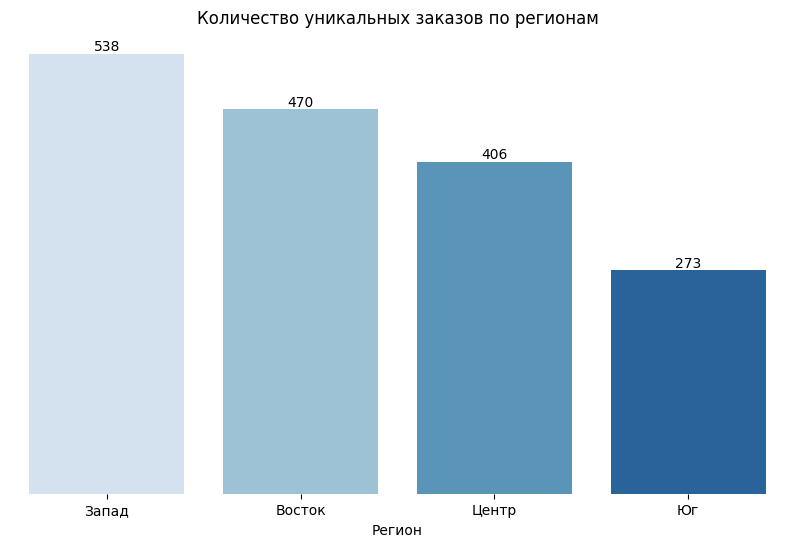

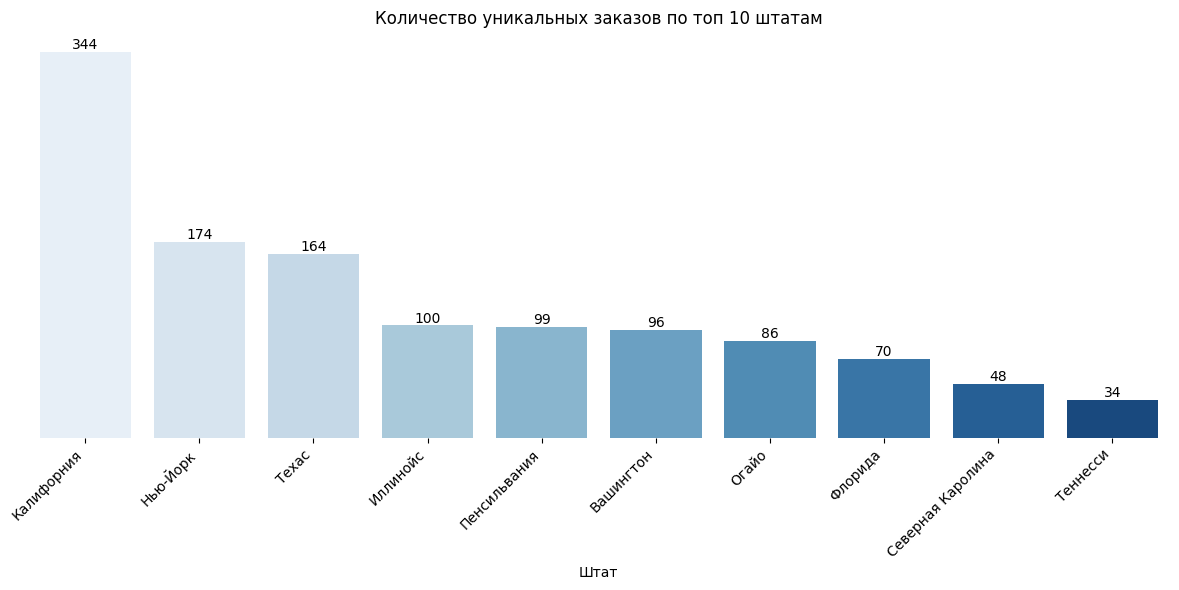

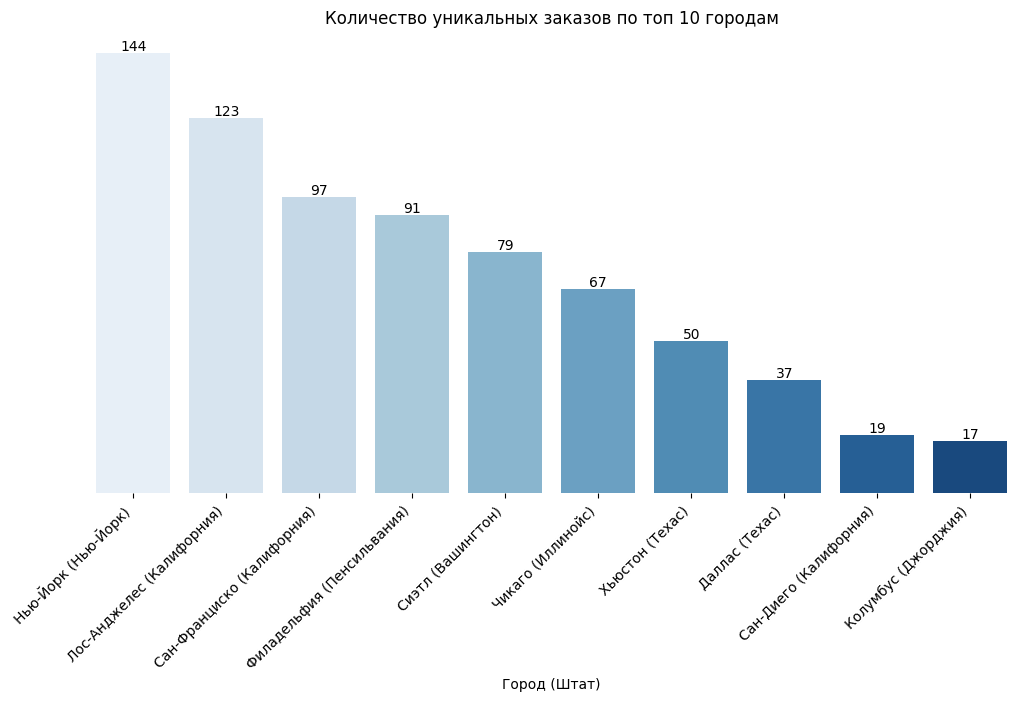

In [ ]:
# Количество уникальных заказов по регионам
orders_by_region = df.groupby('region')['orderId'].nunique().sort_values(ascending=False)

# Применим перевод к индексу (названиям регионов)
orders_by_region.index = [region_translation.get(x, x) for x in orders_by_region.index]

plt.figure(figsize=(10, 6))
ax1 = sns.barplot(x=orders_by_region.index, y=orders_by_region.values, palette='Blues') # Используем палитру 'Blues'
plt.xlabel("Регион")
plt.title("Количество уникальных заказов по регионам")
ax1.yaxis.set_visible(False) # Скрываем ось Y

# Убираем рамку
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Добавляем значения над столбцами
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

# Количество уникальных заказов по штатам
orders_by_state = df.groupby('state')['orderId'].nunique().sort_values(ascending=False)

# Выберем топ 10 штатов
orders_by_state_top10 = orders_by_state.head(10)

# Применим перевод к индексу (названиям топ 10 штатов)
orders_by_state_top10.index = [state_translation.get(state, state) for state in orders_by_state_top10.index]

plt.figure(figsize=(12, 6))
ax2 = sns.barplot(x=orders_by_state_top10.index, y=orders_by_state_top10.values, palette='Blues') # Используем палитру 'Blues'
plt.xticks(rotation=45, ha='right')
plt.xlabel("Штат")
plt.title("Количество уникальных заказов по топ 10 штатам")
ax2.yaxis.set_visible(False) # Скрываем ось Y

# Убираем рамку
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Добавляем значения над столбцами
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

# Количество уникальных заказов по городам (топ 10)
orders_by_city = df.groupby('city_state')['orderId'].nunique().sort_values(ascending=False).head(10)

# Применим перевод к индексу (названиям городов)
orders_by_city.index = [city_translation.get(city, city) for city in orders_by_city.index]

plt.figure(figsize=(12, 6))
ax3 = sns.barplot(x=orders_by_city.index, y=orders_by_city.values, palette='Blues') # Используем палитру 'Blues'
plt.xticks(rotation=45, ha='right')
plt.xlabel("Город (Штат)")
plt.title("Количество уникальных заказов по топ 10 городам")
ax3.yaxis.set_visible(False) # Скрываем ось Y

# Убираем рамку
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Добавляем значения над столбцами
for p in ax3.patches:
    ax3.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

**Выводы по количеству уникальных заказов:**

* **По регионам:**
  * Наибольшее количество уникальных заказов в регионе Запад (538)
  * Наименьшее количество уникальных заказов в регионе Юг (273)
* **По штатам (Топ 10):**
  * Наибольшее количество уникальных заказов в штате Калифорния (344)
  * Наименьшее количество уникальных заказов в округе Колумбия (34)
* **По городам (Топ 10):**
  * Наибольшее количество уникальных заказов в городе Нью-Йорк (штат Нью-Йорк) (144)
  * Наименьшее количество уникальных заказов в топ 10 городах Колумбус (штат Джорджия) (17)

Таким образом, активность покупателей концентрируется в крупных городах и экономически развитых штатах.

## Динамика количества заказов и объема продаж по дате заказа

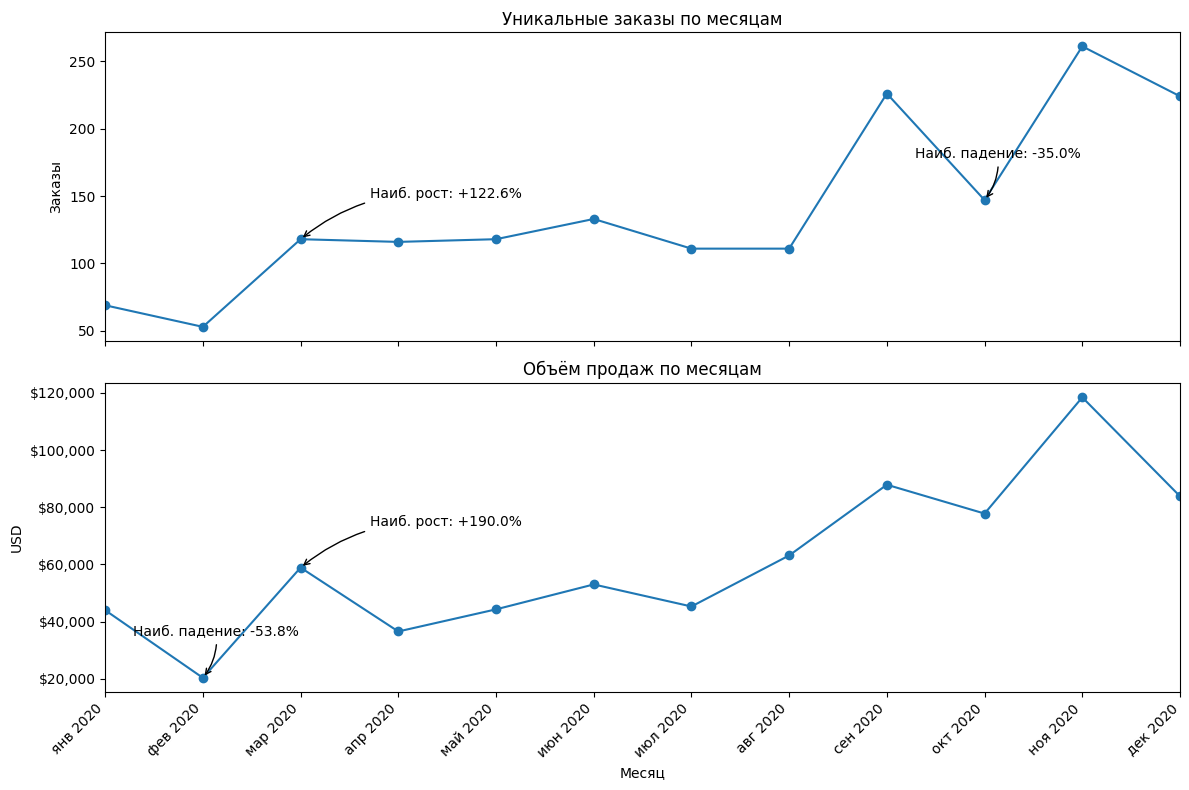

In [ ]:
# df['orderDate'] = pd.to_datetime(df['orderDate'], dayfirst=True, errors='coerce') # Удалена дублирующая строка
df['orderMonth'] = df['orderDate'].dt.to_period('M')
orders_by_month = df.groupby('orderMonth')['orderId'].nunique()
sales_by_month = df.groupby('orderMonth')['sales'].sum()

# привести индекс к Timestamp
orders_by_month.index = orders_by_month.index.to_timestamp()
sales_by_month.index = sales_by_month.index.to_timestamp()

orders_by_month = orders_by_month.sort_index()
# Расчет процентного изменения и определение месяцев с наибольшим падением/ростом для заказов
pct_change_orders = orders_by_month.pct_change().fillna(0)
# Добавляем проверку на пустую серию перед использованием idxmin/idxmax
biggest_drop_orders = (pct_change_orders.idxmin(), pct_change_orders.min()) if not pct_change_orders.empty else (None, None)
biggest_rise_orders = (pct_change_orders.idxmax(), pct_change_orders.max()) if not pct_change_orders.empty else (None, None)

# Расчет процентного изменения и определение месяцев с наибольшим падением/ростом для продаж
pct_change_sales = sales_by_month.pct_change().fillna(0)
# Добавляем проверку на пустую серию перед использованием idxmin/idxmax
biggest_drop_sales = (pct_change_sales.idxmin(), pct_change_sales.min()) if not pct_change_sales.empty else (None, None)
biggest_rise_sales = (pct_change_sales.idxmax(), pct_change_sales.max()) if not pct_change_sales.empty else (None, None)


ru_months = ['янв', 'фев', 'мар', 'апр', 'май', 'июн', 'июл', 'авг', 'сен', 'окт', 'ноя', 'дек']
months = orders_by_month.index
month_labels = [f"{ru_months[d.month-1]} {d.year}" for d in months]

fig, axes = plt.subplots(2, 1, figsize=(12,8), sharex=True)

orders_by_month.plot(ax=axes[0], marker='o')
axes[0].set_title('Уникальные заказы по месяцам')
axes[0].set_ylabel('Заказы')

# Добавляем аннотации для наибольшего падения и роста заказов, если они существуют
if biggest_drop_orders[0] is not None:
    drop_month_label_orders = f"{ru_months[biggest_drop_orders[0].month-1]} {biggest_drop_orders[0].year}"
    axes[0].annotate(f'Наиб. падение: {biggest_drop_orders[1]:.1%}',
                     xy=(biggest_drop_orders[0], orders_by_month[biggest_drop_orders[0]]),
                     xytext=(-50, 30), textcoords='offset points',
                     arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.2'))

if biggest_rise_orders[0] is not None:
    rise_month_label_orders = f"{ru_months[biggest_rise_orders[0].month-1]} {biggest_rise_orders[0].year}"
    axes[0].annotate(f'Наиб. рост: +{biggest_rise_orders[1]:.1%}',
                     xy=(biggest_rise_orders[0], orders_by_month[biggest_rise_orders[0]]),
                     xytext=(50, 30), textcoords='offset points',
                     arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))


sales_by_month.plot(ax=axes[1], marker='o')
axes[1].set_title('Объём продаж по месяцам')
axes[1].set_ylabel('USD')
axes[1].yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

# Добавляем аннотации для наибольшего падения и роста продаж, если они существуют
if biggest_drop_sales[0] is not None:
    drop_month_label_sales = f"{ru_months[biggest_drop_sales[0].month-1]} {biggest_drop_sales[0].year}"
    axes[1].annotate(f'Наиб. падение: {biggest_drop_sales[1]:.1%}',
                     xy=(biggest_drop_sales[0], sales_by_month[biggest_drop_sales[0]]),
                     xytext=(-50, 30), textcoords='offset points',
                     arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.2'))

if biggest_rise_sales[0] is not None:
    rise_month_label_sales = f"{ru_months[biggest_rise_sales[0].month-1]} {biggest_rise_sales[0].year}"
    axes[1].annotate(f'Наиб. рост: +{biggest_rise_sales[1]:.1%}',
                     xy=(biggest_rise_sales[0], sales_by_month[biggest_rise_sales[0]]),
                     xytext=(50, 30), textcoords='offset points',
                     arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))


# установить тики и русские метки на нижней оси
axes[1].set_xticks(months)
axes[1].set_xticklabels(month_labels, rotation=45, ha='right')
axes[1].set_xlabel('Месяц')

plt.tight_layout()
plt.show()

**Выводы по динамике количества заказов и объема продаж по месяцам:**
* Наблюдается общий рост количества заказов и объема продаж за 2020 год. Минимальные показатели и по количеству заказов и объему продаж были в феврале, максимальные - в ноябре.
* Наибольшее падение количества уникальных заказов произошло в октябре (-35.0%), а наибольший рост - в марте (+122.6%).
* Наибольшее падение объема продаж произошло в феврале (-53.8%), а наибольший рост - в марте (+189.9%).
* Крупнейшие пики по объёму продаж и по числу уникальных заказов практически совпадают по месяцам — это говорит о том, что рост в количестве заказов в первую очередь приносит рост выручки (положительная корреляция).
* В некоторых месячная выручка росла сильнее, чем число заказов (в март рост заказов +122.6% и рост продаж +190% и в июле, августе число заказов относительно стабильно, тогда как объём продаж растёт). Это означает, что в эти месяцы средняя стоимость заказа увеличилась — либо за счёт более дорогих товаров, либо за счёт большего числа позиций в заказе.


## Распределение продаж по категориям и подкатегориям заказов

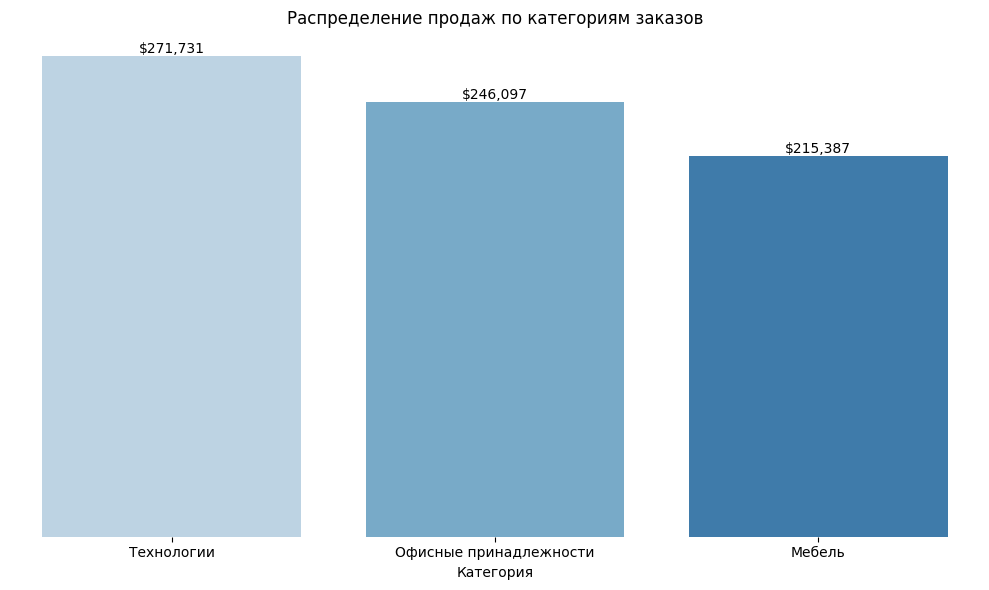

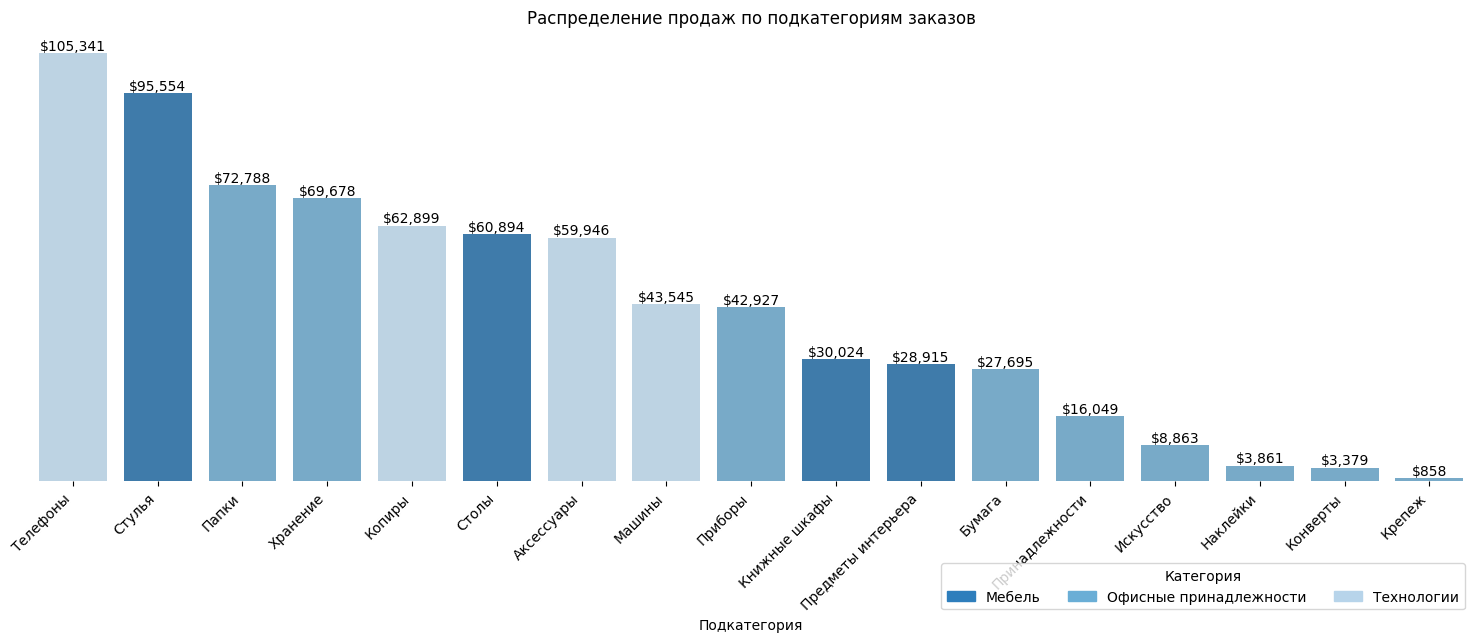

In [ ]:
# Сгруппировать по категориям и просуммировать продажи
sales_by_category = df.groupby('category')['sales'].sum().sort_values(ascending=False)

# Применим перевод к индексу (названиям регионов)
sales_by_category.index = [category_translation.get(cat, cat) for cat in sales_by_category.index]

# Определим конкретные цвета для категорий в синей гамме, как на предыдущих графиках
from matplotlib.cm import get_cmap
cmap = get_cmap('Blues')

# Порядок категорий после перевода: ['Мебель', 'Офисные принадлежности', 'Технологии']
category_order_translated = ['Мебель', 'Офисные принадлежности', 'Технологии']
# Получим текущий порядок категорий в sales_by_category.index
current_category_order = sales_by_category.index.tolist()
# Создадим список цветов в соответствии с текущим порядком категорий
colors = [cmap(0.7), cmap(0.5), cmap(0.3)] # Оттенки для Мебели, Офисных принадлежностей, Технологий (от темного к светлому)
# Создадим словарь для соответствия переведенных названий категорий и цветов
category_colors = dict(zip(category_order_translated, colors))
# Создадим список цветов в порядке текущих категорий
ordered_colors = [category_colors[cat] for cat in current_category_order]


plt.figure(figsize=(10, 6))
# Используем определенные цвета для первого графика
ax1 = sns.barplot(x=sales_by_category.index, y=sales_by_category.values, palette=ordered_colors)
plt.xlabel("Категория")
plt.title("Распределение продаж по категориям заказов")
ax1.yaxis.set_visible(False) # Скрываем ось Y

# Убираем рамку
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Добавляем значения над столбцами в валюте, округленные до целых
for p in ax1.patches:
    ax1.annotate(f'${round(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

# Сгруппировать по подкатегориям и просуммировать продажи
sales_by_subcategory = df.groupby('subCategory')['sales'].sum().sort_values(ascending=False)

# Применим перевод к индексу (названиям подкатегорий), используя dictionary comprehension
sales_by_subcategory.index = [subcategory_translation.get(subcat, subcat) for subcat in sales_by_subcategory.index]

plt.figure(figsize=(15, 8))

# Создадим список цветов для подкатегорий на основе их категорий
subcategory_colors_list = []
# Получим соответствие подкатегорий и их категорий из исходного DataFrame
subcategory_to_category = df.drop_duplicates('subCategory').set_index('subCategory')['category'].to_dict()

for subcat_translated in sales_by_subcategory.index:
    # Найдем оригинальное название подкатегории по переведенному
    original_subcat = next((original for original, translated in subcategory_translation.items() if translated == subcat_translated), subcat_translated)
    # Найдем категорию для этой подкатегории
    category = subcategory_to_category.get(original_subcat)
    # Получим переведенное название категории
    category_translated = category_translation.get(category, category)
    # Добавим соответствующий цвет из словаря category_colors
    subcategory_colors_list.append(category_colors.get(category_translated, 'gray')) # Цвет по умолчанию серый, если категория не найдена


ax2 = sns.barplot(x=sales_by_subcategory.index, y=sales_by_subcategory.values, palette=subcategory_colors_list)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Подкатегория")
plt.title("Распределение продаж по подкатегориям заказов")
ax2.yaxis.set_visible(False) # Скрываем ось Y

# Убираем рамку
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Добавляем значения над столбцами
for p in ax2.patches:
    ax2.annotate(f'${round(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Добавляем легенду с категориями и их цветами
handles = [plt.Rectangle((0,0),1,1, color=category_colors[label]) for label in category_colors]
plt.legend(handles, category_colors.keys(), title='Категория', bbox_to_anchor=(1.0, -0.3), loc='lower right', ncol=len(category_colors))

plt.tight_layout(rect=[0, 0.15, 1, 1]) # Adjust layout to make space for the legend
plt.show()

In [ ]:
pivot_cat_sub = df.pivot_table(index='category', columns='subCategory', values='sales', aggfunc='sum', fill_value=0, margins=True, margins_name='Total')

# Применим перевод к индексам и столбцам сводной таблицы
pivot_cat_sub.index = [category_translation.get(cat, cat) for cat in pivot_cat_sub.index]

# Транспонируем сводную таблицу
pivot_cat_sub_transposed = pivot_cat_sub.T

# Применим перевод к индексу (названиям подкатегорий), исключая "Total"
pivot_cat_sub_transposed.index = [subcategory_translation.get(subcat, subcat) if subcat != 'Total' else 'Итого' for subcat in pivot_cat_sub_transposed.index]

plt.show()

# Вывести транспонированную сводную таблицу, округленную до целых, исключая столбец "Total" по подкатегориям
print("Сводная таблица продаж по категориям и подкатегориям ($):")
print(pivot_cat_sub_transposed.drop(columns=['Total']).astype(int))

Сводная таблица продаж по категориям и подкатегориям ($):
                    Мебель  Офисные принадлежности  Технологии
Аксессуары               0                       0       59946
Приборы                  0                   42926           0
Искусство                0                    8863           0
Папки                    0                   72788           0
Книжные шкафы        30024                       0           0
Стулья               95554                       0           0
Копиры                   0                       0       62899
Конверты                 0                    3378           0
Крепеж                   0                     857           0
Предметы интерьера   28915                       0           0
Наклейки                 0                    3861           0
Машины                   0                       0       43544
Бумага                   0                   27694           0
Телефоны                 0                       0      1053

**Выводы по распределению продаж ($):**
 - Лидирующая категория по объему продаж: Технологии (271730)
 - Отстающая категория по объему продаж: Мебель (215387)

 - Лидирующая подкатегория по объему продаж: Телефоны (105340)
 - Отстающая подкатегория по объему продаж: Крепеж (858)

Таким образом категория Технологии, а в частности Телефоны являются приоритетным направлением для расширения ассортимента.

## Распределение продаж по городам (Топ-10), штатам (Топ-10) и регионам

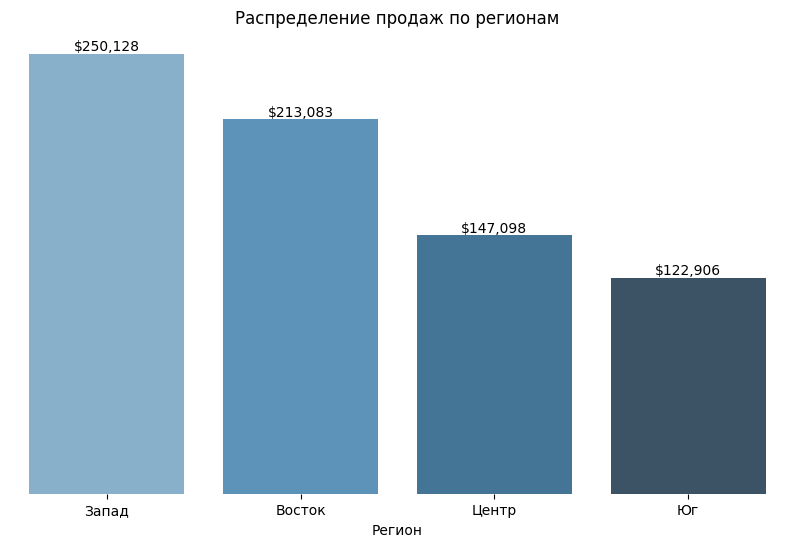

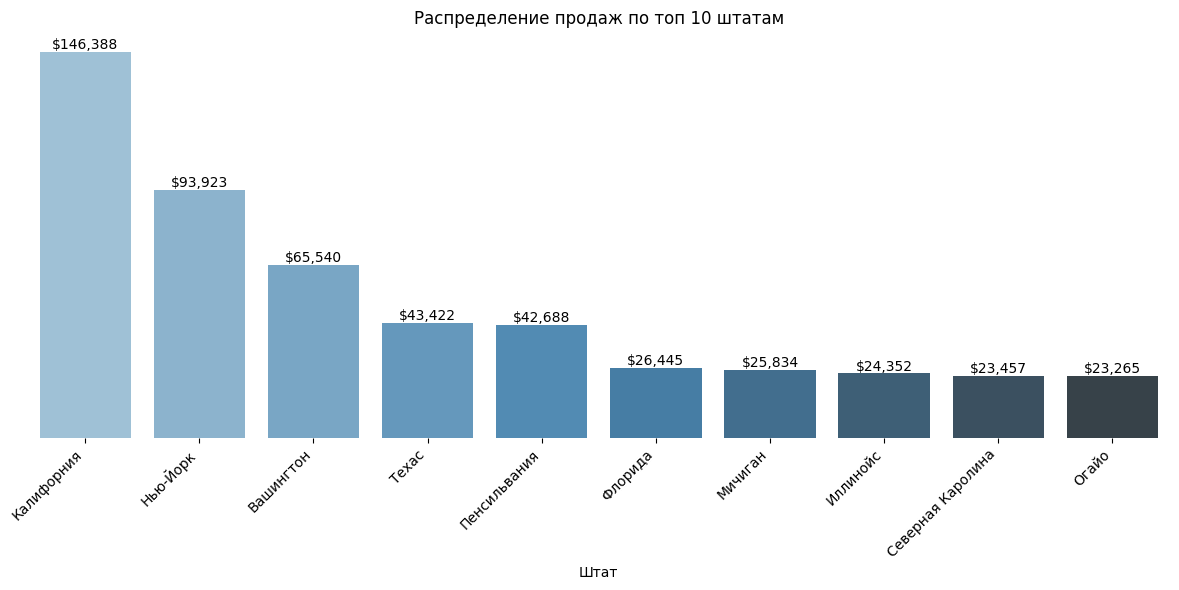

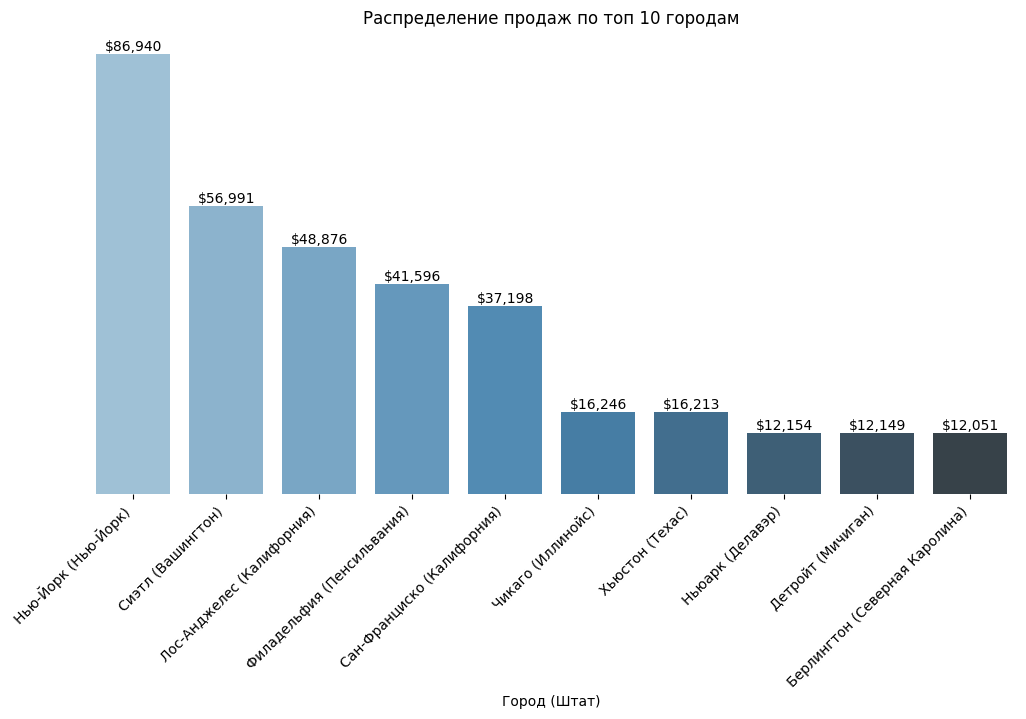

In [ ]:
# Распределение продаж по регионам
sales_by_region = df.groupby('region')['sales'].sum().sort_values(ascending=False)

# Применим перевод к индексу (названиям регионов)
sales_by_region.index = [region_translation.get(x, x) for x in sales_by_region.index]


plt.figure(figsize=(10, 6))
ax1 = sns.barplot(x=sales_by_region.index, y=sales_by_region.values, palette='Blues_d')
plt.xlabel("Регион")
plt.title("Распределение продаж по регионам") # Обновляем заголовок
ax1.yaxis.set_visible(False) # Скрываем ось Y

# Убираем рамку
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Добавляем значения над столбцами в валюте, округленные до целых
for p in ax1.patches:
    ax1.annotate(f'${round(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

# Распределение продаж по штатам
sales_by_state = df.groupby('state')['sales'].sum().sort_values(ascending=False)

# Выберем топ 10 штатов
sales_by_state_top10 = sales_by_state.head(10)

# Применим перевод к индексу (названиям топ 10 штатов)
sales_by_state_top10.index = [state_translation.get(state, state) for state in sales_by_state_top10.index]

plt.figure(figsize=(12, 6))
ax2 = sns.barplot(x=sales_by_state_top10.index, y=sales_by_state_top10.values, palette='Blues_d')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Штат")
plt.title("Распределение продаж по топ 10 штатам") # Обновляем заголовок
ax2.yaxis.set_visible(False) # Скрываем ось Y

# Убираем рамку
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Добавляем значения над столбцами в валюте, округленные до целых
for p in ax2.patches:
    ax2.annotate(f'${round(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

# Создадим новую колонку с названием города и штата
# df['city_state'] = df['city'] + ' (' + df['state'] + ')' # Удалена дублирующая строка

# Распределение продаж по городам (топ 10)
sales_by_city = df.groupby('city_state')['sales'].sum().sort_values(ascending=False).head(10)

# Применим перевод к индексу (названиям городов)
sales_by_city.index = [city_translation.get(city, city) for city in sales_by_city.index]


plt.figure(figsize=(12, 6))
ax3 = sns.barplot(x=sales_by_city.index, y=sales_by_city.values, palette='Blues_d')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Город (Штат)")
plt.title("Распределение продаж по топ 10 городам") # Обновляем заголовок
ax3.yaxis.set_visible(False) # Скрываем ось Y

# Убираем рамку
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Добавляем значения над столбцами в валюте, округленные до целых
for p in ax3.patches:
    ax3.annotate(f'${round(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

**Выводы по распределению продаж ($):**

* **По регионам:**
    * Наибольший объем продаж зафиксирован в регионе **Запад** (250128).
    * Наименьший объем продаж зафиксирован в регионе **Юг** (122906).
* **По штатам (Топ 10):**
    * Лидером по объему продаж является штат **Калифорния** (146388).
    * Топ 10 штатов по объему продаж включают **Калифорнию, Нью-Йорк, Вашингтон** и другие штаты с высокими показателями.
* **По городам (Топ 10):**
    * Наибольший объем продаж зафиксирован в городе **Нью-Йорк (Нью-Йорк)** (86940).
    * Топ 10 городов по объему продаж в основном сосредоточены в штатах с высоким общим объемом продаж.

## Определение топ-10 популярных товаров

In [ ]:
top_10_products_quantity = df.groupby('productName')['quantity'].sum().sort_values(ascending=False).head(10)
print("Топ 10 самых популярных товаров по количеству проданных единиц:")
print(top_10_products_quantity)

Топ 10 самых популярных товаров по количеству проданных единиц:
productName
Staples                                                                           68
Easy-staple paper                                                                 58
Staples in misc. colors                                                           52
Staple envelope                                                                   39
Storex Dura Pro Binders                                                           37
Eldon Wave Desk Accessories                                                       34
Memorex Mini Travel Drive 16 GB USB 2.0 Flash Drive                               34
Lesro Sheffield Collection Coffee Table, End Table, Center Table, Corner Table    30
Logitech Desktop MK120 Mouse and keyboard Combo                                   29
Adjustable Depth Letter/Legal Cart                                                29
Name: quantity, dtype: int64


In [ ]:
# Определение топ-10 популярных товаров по сумме продаж
top_10_products_sales = df.groupby('productName')['sales'].sum().sort_values(ascending=False).head(10)

print("\nТоп 10 самых популярных товаров по сумме продаж:")
print(top_10_products_sales)


Топ 10 самых популярных товаров по сумме продаж:
productName
Canon imageCLASS 2200 Advanced Copier                                          35699.898
Martin Yale Chadless Opener Electric Letter Opener                             11825.902
GBC DocuBind TL300 Electric Binding System                                     10943.278
Hewlett Packard LaserJet 3310 Copier                                            9239.846
Samsung Galaxy Mega 6.3                                                         9239.780
Cubify CubeX 3D Printer Triple Head Print                                       7999.980
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     7371.742
HON 5400 Series Task Chairs for Big and Tall                                    7220.094
GBC DocuBind P400 Electric Binding System                                       7077.148
Lexmark MX611dhe Monochrome Laser Printer                                       5609.967
Name: sales, dtype: float64


In [ ]:
# Создание словаря
product_translation = {
    'Staples': 'Скрепки',
    'Easy-staple paper': 'Бумага для степлера Easy-staple',
    'Staples in misc. colors': 'Скрепки разных цветов',
    'Staple envelope': 'Конверт для степлера',
    'Storex Dura Pro Binders': 'Папки Storex Dura Pro',
    'Eldon Wave Desk Accessories': 'Настольные аксессуары Eldon Wave',
    'Memorex Mini Travel Drive 16 GB USB 2.0 Flash Drive': 'Флеш-накопитель Memorex Mini Travel Drive 16 ГБ USB 2.0',
    'Lesro Sheffield Collection Coffee Table, End Table, Center Table, Corner Table': 'Журнальный столик, приставной столик, центральный столик, угловой столик из коллекции Lesro Sheffield',
    'Logitech Desktop MK120 Mouse and keyboard Combo': 'Набор из мыши и клавиатуры Logitech Desktop MK120',
    'Adjustable Depth Letter/Legal Cart': 'Тележка с регулируемой глубиной для писем/юридических документов',
    'Canon imageCLASS 2200 Advanced Copier': 'Усовершенствованный копир Canon imageCLASS 2200',
    'Martin Yale Chadless Opener Electric Letter Opener': 'Электрический вскрыватель писем Martin Yale Chadless',
    'GBC DocuBind TL300 Electric Binding System': 'Электрическая система переплета GBC DocuBind TL300',
    'Hewlett Packard LaserJet 3310 Copier': 'Копир Hewlett Packard LaserJet 3310',
    'Samsung Galaxy Mega 6.3': 'Samsung Galaxy Mega 6.3', # Предполагается, что это название не требует перевода
    'Cubify CubeX 3D Printer Triple Head Print': 'Трехголовочный 3D-принтер Cubify CubeX',
    'Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind': 'Электрическая машина для пластикового переплета Fellowes PB500 с ручным переплетом',
    'HON 5400 Series Task Chairs for Big and Tall': 'Офисные кресла серии HON 5400 для крупногабаритных пользователей',
    'GBC DocuBind P400 Electric Binding System': 'Электрическая система переплета GBC DocuBind P400',
    'Lexmark MX611dhe Monochrome Laser Printer': 'Монохромный лазерный принтер Lexmark MX611dhe'
}

print(product_translation)

{'Staples': 'Скрепки', 'Easy-staple paper': 'Бумага для степлера Easy-staple', 'Staples in misc. colors': 'Скрепки разных цветов', 'Staple envelope': 'Конверт для степлера', 'Storex Dura Pro Binders': 'Папки Storex Dura Pro', 'Eldon Wave Desk Accessories': 'Настольные аксессуары Eldon Wave', 'Memorex Mini Travel Drive 16 GB USB 2.0 Flash Drive': 'Флеш-накопитель Memorex Mini Travel Drive 16 ГБ USB 2.0', 'Lesro Sheffield Collection Coffee Table, End Table, Center Table, Corner Table': 'Журнальный столик, приставной столик, центральный столик, угловой столик из коллекции Lesro Sheffield', 'Logitech Desktop MK120 Mouse and keyboard Combo': 'Набор из мыши и клавиатуры Logitech Desktop MK120', 'Adjustable Depth Letter/Legal Cart': 'Тележка с регулируемой глубиной для писем/юридических документов', 'Canon imageCLASS 2200 Advanced Copier': 'Усовершенствованный копир Canon imageCLASS 2200', 'Martin Yale Chadless Opener Electric Letter Opener': 'Электрический вскрыватель писем Martin Yale Chadl

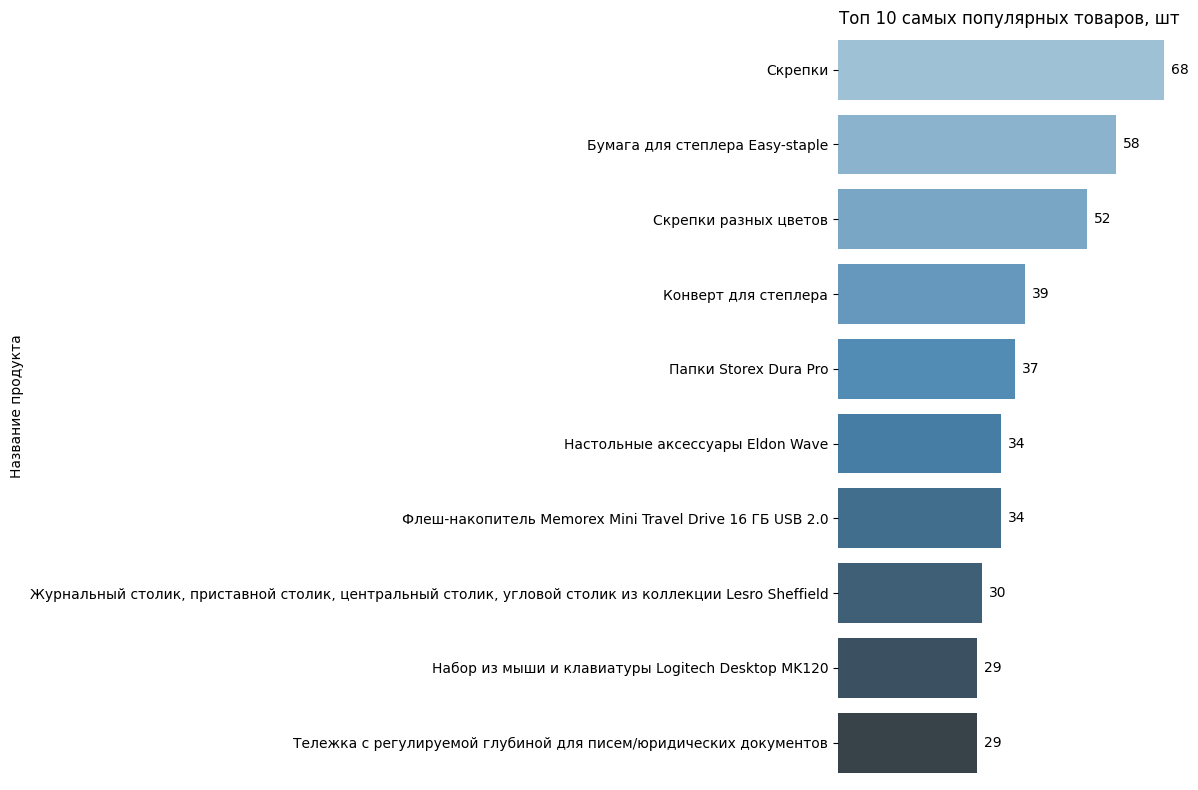

In [ ]:
# Применим перевод к индексу (названиям товаров)
top_10_products_quantity.index = top_10_products_quantity.index.map(product_translation)

# Создадим горизонтальную столбчатую диаграмму
plt.figure(figsize=(12, 8))
ax = sns.barplot(y=top_10_products_quantity.index, x=top_10_products_quantity.values, palette='Blues_d')

# Установим соответствующие подписи и заголовок
plt.xlabel("Количество проданных единиц")
plt.ylabel("Название продукта")
plt.title("Топ 10 самых популярных товаров, шт")

# Удалим рамку графика
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Скроем ось X
ax.xaxis.set_visible(False)

# Добавим текстовые метки с количеством проданных единиц на каждый столбец
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                 ha='left', va='center', xytext=(5, 0), textcoords='offset points')

# Обеспечим корректное отображение всех элементов графика
plt.tight_layout()
plt.show()

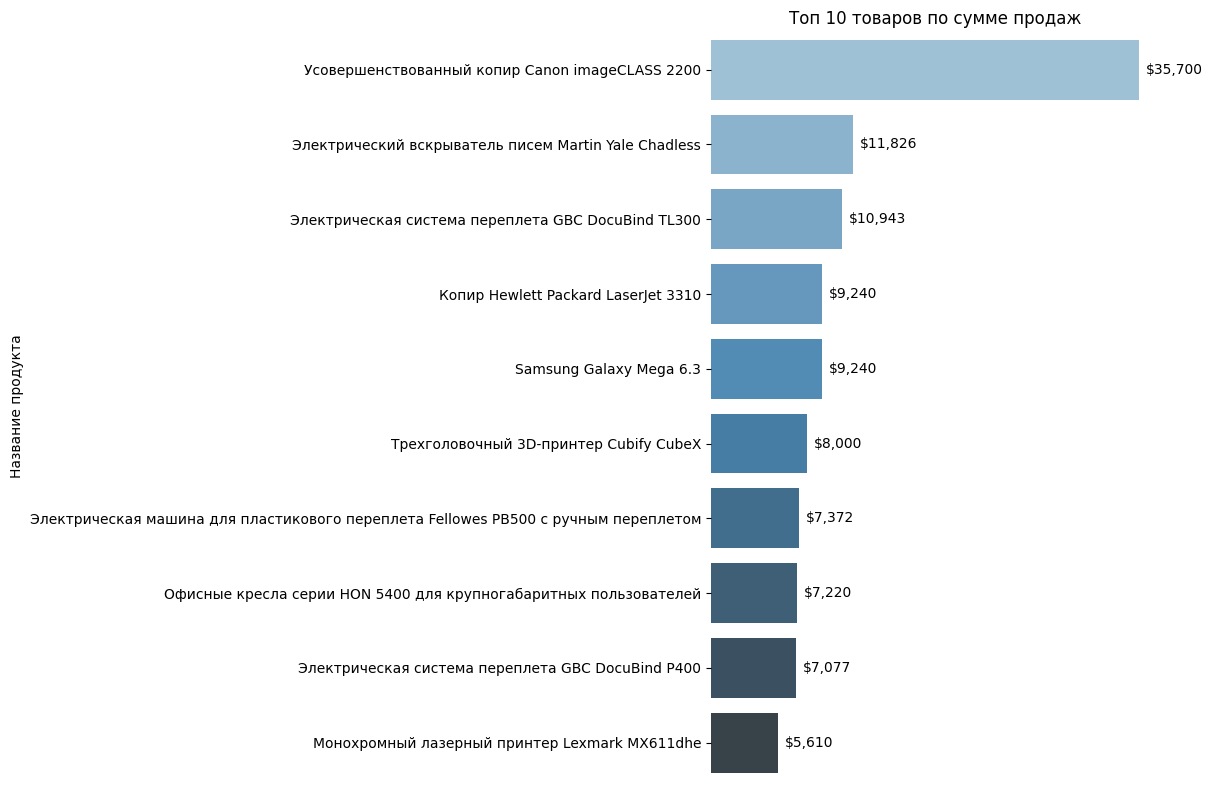

In [ ]:
# Применим перевод к индексу (названиям товаров), сохраняя оригинал, если перевод не найден
top_10_products_sales.index = [product_translation.get(product, product) for product in top_10_products_sales.index]

# Создадим горизонтальную столбчатую диаграмму для продаж
plt.figure(figsize=(12, 8))
ax = sns.barplot(y=top_10_products_sales.index, x=top_10_products_sales.values, palette='Blues_d')

# Установим соответствующие подписи и заголовок
plt.xlabel("Сумма продаж")
plt.ylabel("Название продукта")
plt.title("Топ 10 товаров по сумме продаж")

# Удалим рамку графика
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Скроем ось X
ax.xaxis.set_visible(False)

# Добавим текстовые метки с суммой продаж на каждый столбец в валюте, округленные до целых
for p in ax.patches:
    ax.annotate(f'${round(p.get_width()):,}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                 ha='left', va='center', xytext=(5, 0), textcoords='offset points')

# Обеспечим корректное отображение всех элементов графика
plt.tight_layout()
plt.show()

**Вывод по самым популярным товарам из Топ-10:**

Топ-10 товаров в основном состоит из офисных расходников (скрепки, бумага, конверты и т.д.). Это позиции с низкой ценой и массовым спросом, которые формируют постоянную основу заказов. Однако по объёму продаж лидируют другие позиции (например, техника), что связано с более высоким средним чеком.
  

## Распределение категорий внутри города или штата

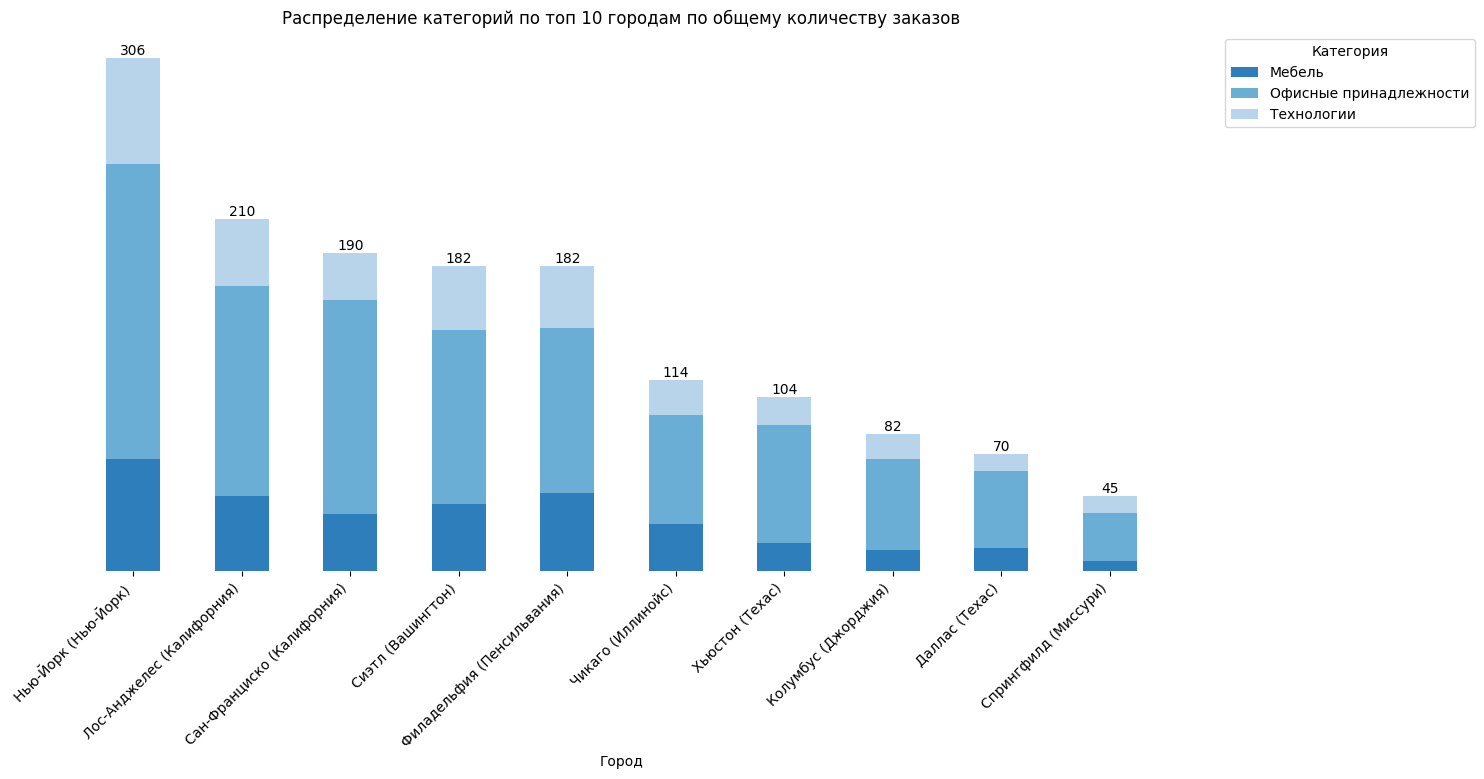

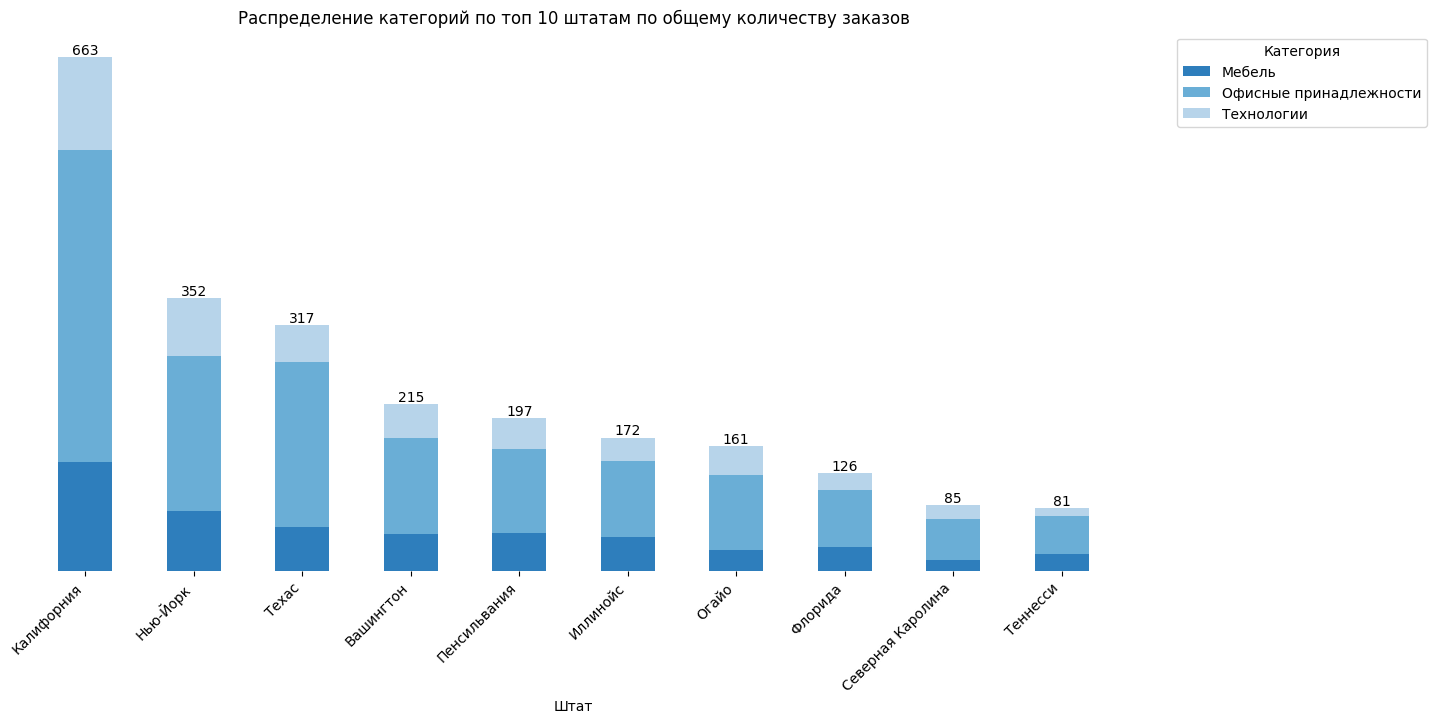

In [ ]:
# Сгруппируем данные по городу и категории, затем посчитаем количество заказов в каждой группе
category_by_city = df.groupby(['city', 'category']).size().unstack(fill_value=0)

# Выберем топ 10 городов для визуализации (например, топ 10 по общему количеству заказов)
top_cities = df['city'].value_counts().head(10).index
# Используем reindex и fillna для безопасного выбора городов
category_by_city_top_cities = category_by_city.reindex(top_cities).fillna(0)

# Применяем перевод к индексу (названиям городов)
def translate_city_name(city):
    # Найдем штат для данного города. Используем более надежный способ с проверкой на пустоту
    s = df.loc[df['city'] == city, 'state']
    state = s.iloc[0] if not s.empty else ''
    city_state_key = city + ' (' + state + ')'
    return city_translation.get(city_state_key, city)

category_by_city_top_cities.index = [translate_city_name(city) for city in category_by_city_top_cities.index]

# Применяем перевод к названиям категорий в столбцах
category_by_city_top_cities.columns = [category_translation.get(cat, cat) for cat in category_by_city_top_cities.columns]

# Зададим конкретные цвета для категорий, чтобы "Мебель" был более заметен
from matplotlib.cm import get_cmap
cmap = get_cmap('Blues')
# Выберем три оттенка из палитры Blues для контраста, соответствующие порядку категорий
# Порядок категорий после перевода: ['Мебель', 'Офисные принадлежности', 'Технологии']
category_order_translated = ['Мебель', 'Офисные принадлежности', 'Технологии']
existing_categories_translated = [cat for cat in category_order_translated if cat in category_by_city_top_cities.columns]
category_by_city_top_cities = category_by_city_top_cities[existing_categories_translated]
# Убедимся, что число цветов соответствует числу категорий
colors = [cmap(0.7), cmap(0.5), cmap(0.3)][:len(existing_categories_translated)]


# Визуализируем распределение категорий по топ 10 городам
ax = category_by_city_top_cities.plot(kind='bar', stacked=True, figsize=(14, 7), color=colors)
plt.xlabel("Город")
plt.title("Распределение категорий по топ 10 городам по общему количеству заказов")
ax.yaxis.set_visible(False) # Скрываем ось Y
ax.grid(False) # Убираем линии сетки

# Убираем рамку
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Добавляем общее количество заказов над столбцами
# Рассчитаем общую сумму для каждого города
total_orders_by_city = category_by_city_top_cities.sum(axis=1)

for i, total in enumerate(total_orders_by_city):
    ax.text(i, total, str(total), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right') # Делаем названия городов наискосок
plt.legend(title="Категория", bbox_to_anchor=(1.05, 1), loc='upper left') # Оставляем легенду

plt.show()

# изучить распределение категорий внутри штатов
# Сгруппируем данные по штату и категории, затем посчитаем количество заказов в каждой группе
category_by_state = df.groupby(['state', 'category']).size().unstack(fill_value=0)

# Выберем топ N штатов для визуализации (например, топ 10 по общему количеству заказов)
top_states = df['state'].value_counts().head(10).index
category_by_state_top_states = category_by_state.loc[top_states]

# Применяем перевод к индексу (названиям штатов)
category_by_state_top_states.index = [state_translation.get(state, state) for state in category_by_state_top_states.index]

# Применяем перевод к названиям категорий в столбцах
category_by_state_top_states.columns = [category_translation.get(cat, cat) for cat in category_by_state_top_states.columns]

# Зададим конкретные цвета для категорий, используя ту же палитру Blues
colors = [cmap(0.7), cmap(0.5), cmap(0.3)]

# Чтобы точно сопоставить цвета с категориями, можно переупорядочить столбцы DataFrame перед построением графика
# Укажите желаемый порядок переведенных категорий
category_order_translated = ['Мебель', 'Офисные принадлежности', 'Технологии']
existing_categories_translated = [cat for cat in category_order_translated if cat in category_by_state_top_states.columns]
category_by_state_top_states = category_by_state_top_states[existing_categories_translated]


# Визуализируем распределение категорий по топ 10 штатам
ax_state = category_by_state_top_states.plot(kind='bar', stacked=True, figsize=(14, 7), color=colors)
plt.xlabel("Штат")
plt.title("Распределение категорий по топ 10 штатам по общему количеству заказов")
ax_state.yaxis.set_visible(False) # Скрываем ось Y
ax_state.grid(False) # Убираем линии сетки

# Убираем рамку
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Добавляем общее количество заказов над столбцами
# Рассчитаем общую сумму для каждого штата
total_orders_by_state = category_by_state_top_states.sum(axis=1)

for i, total in enumerate(total_orders_by_state):
    ax_state.text(i, total, str(total), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right') # Делаем названия штатов наискосок
plt.legend(title="Категория", bbox_to_anchor=(1.05, 1), loc='upper left') # Оставляем легенду

plt.show()

**Выводы по распределению категорий по топ-10 городам и штатам:**

*  В большинстве городов и штатов из топ-10 категория "Офисные принадлежности" занимает наибольшую долю в общем количестве заказов. Это говорит о высоком спросе на офисные принадлежности во всех локациях.
*  Категории "Технологии" и "Мебель" также присутствуют во всех топ-10 городах и штатах, но их доля в общем количестве заказов, как правило, меньше, чем у категории "Офисные принадлежности".
*  Хотя общая тенденция с преобладанием категории "Офисные принадлежности" сохраняется", есть некоторая вариативность в соотношении категорий "Технологии" и "Мебель" -  может быть больше или та или другая категория.
*   Топ-10 городов по количеству заказов являются крупными населенными пунктами, что логично коррелирует с общим объемом заказов и разнообразием покупаемых товаров.


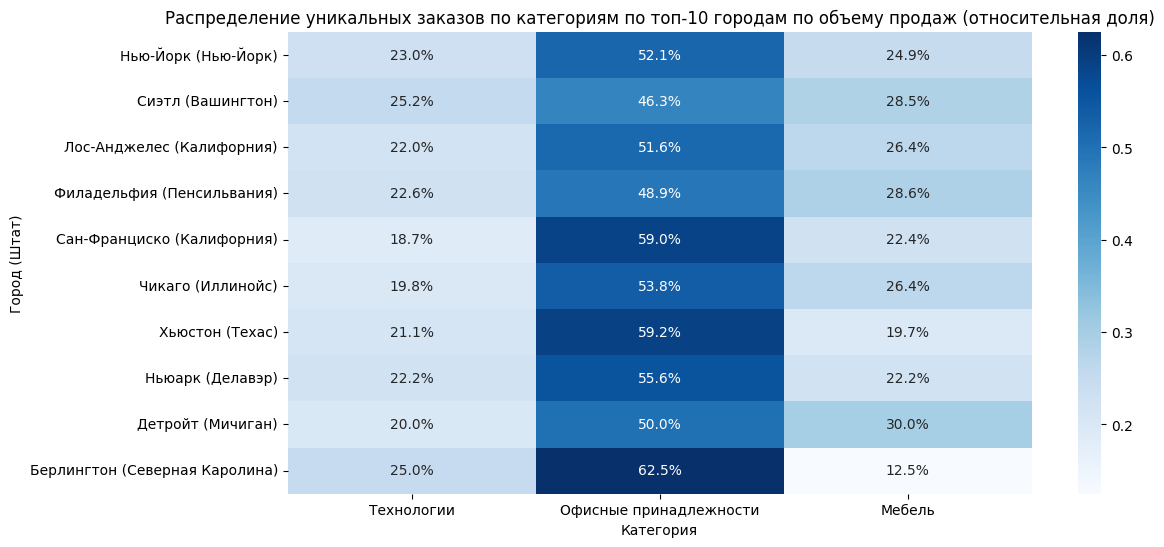

In [ ]:
cat_by_city = df.groupby(['city_state','category'])['orderId'].nunique().reset_index(name='orders')
# Выберем топ 10 городов по продажам из исходного df (до группировки по city_state)
top_cities_by_sales = df.groupby('city_state')['sales'].sum().nlargest(10).index
subset = cat_by_city[cat_by_city['city_state'].isin(top_cities_by_sales)].copy() # Added .copy() to avoid SettingWithCopyWarning
pivot = subset.pivot(index='city_state', columns='category', values='orders').fillna(0)

# Применяем перевод к индексу (названиям городов со штатами)
pivot.index = [city_translation.get(city_state, city_state) for city_state in pivot.index]

# Применяем перевод к названиям категорий в столбцах
pivot.columns = [category_translation.get(cat, cat) for cat in pivot.columns]

# Рассчитаем относительную долю категорий по городам, обрабатывая возможное деление на ноль
pivot_relative = pivot.div(pivot.sum(axis=1).replace(0, 1), axis=0)

# Сортируем города по общей сумме продаж (используя исходный df, так как pivot_relative - относительные доли)
city_order = df.groupby('city_state')['sales'].sum().loc[top_cities_by_sales].sort_values(ascending=False).index
# Применяем перевод к city_order для сортировки pivot_relative
city_order_translated = [city_translation.get(city_state, city_state) for city_state in city_order]
pivot_relative = pivot_relative.loc[city_order_translated]

# Сортируем категории по общей сумме продаж (используя исходный df)
category_order = df.groupby('category')['sales'].sum().sort_values(ascending=False).index
# Применяем перевод к category_order для сортировки pivot_relative
category_order_translated = [category_translation.get(cat, cat) for cat in category_order]
pivot_relative = pivot_relative[category_order_translated]


plt.figure(figsize=(12,6))
sns.heatmap(pivot_relative, annot=True, fmt='.1%', cmap='Blues') # Изменяем fmt на '.1%' для отображения процентов
plt.title('Распределение уникальных заказов по категориям по топ-10 городам по объему продаж (относительная доля)') # Обновляем заголовок
plt.ylabel('Город (Штат)')
plt.xlabel('Категория')
plt.show()

**Выводы по тепловой карте распределения уникальных заказов по категориям по топ-10 городам:**
- В большинстве топ-10 городов наибольшее количество уникальных заказов приходится на категорию 'Офисные принадлежности'. Например, в Нью-Йорке на эту категорию приходится 52.1% уникальных заказов, в Сиэтле - 46.3%, а в Лос-Анджелесе - 51.6%. Это указывает на стабильный и высокий спрос на товары этой категории в наиболее прибыльных городах.
- Категории 'Технологии' и 'Мебель' представлены меньшими по числу заказов, но именно такие позиции вероятно дают высокий средний чек и формируют крупные всплески выручки. Например, в Нью-Йорке на 'Технологии' приходится 23.0% заказов, на 'Мебель' - 24.9%. В Сиэтле эти доли составляют 25.2% и 28.5% соответственно.
- Существуют различия в относительном количестве уникальных заказов по категориям между городами, что указывает на региональные особенности спроса. Например, в Берлингтоне доля заказов в категории 'Офисные принадлежности' выше (62.5%), а доля 'Мебели' ниже (12.5%) по сравнению с другими городами.
- Анализ относительных долей позволяет лучше понять структуру спроса в каждом городе и выявить города с потенциалом для роста в определенных категориях, несмотря на меньшее общее количество заказов.

## Динамика продаж внутри категорий и подкатегорий


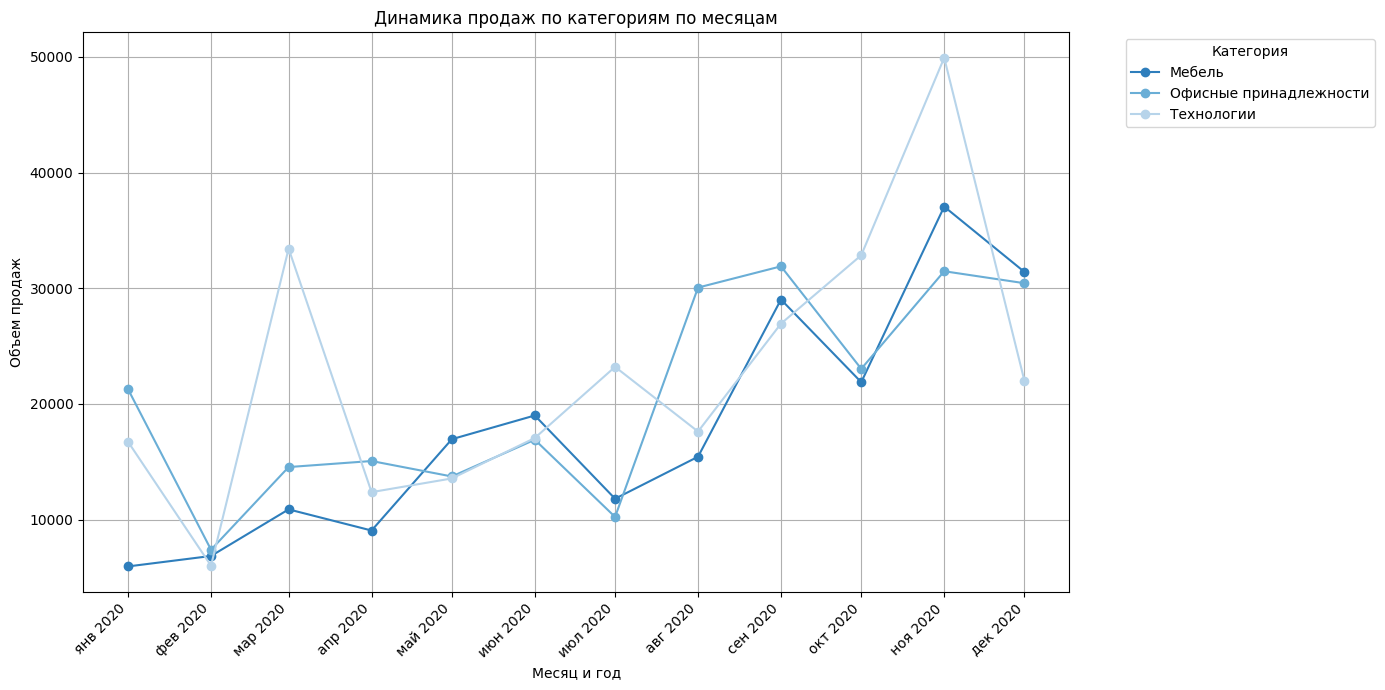

In [ ]:
# Извлечь месяц и год из orderDate и создать столбец orderMonth
df['orderDate'] = pd.to_datetime(df['orderDate'], dayfirst=True, errors='coerce') # Удалена дублирующая строка
df['orderMonth'] = df['orderDate'].dt.to_period('M')

# Сгруппируем данные по месяцу и году и категории, затем просуммируем продажи
sales_by_category_over_time = df.groupby(['orderMonth', 'category'])['sales'].sum().unstack(fill_value=0)

plt.figure(figsize=(14, 7))
ax = plt.gca()

# Определим конкретные цвета для категорий: Furniture (темнее светлого), Office Supplies (темнее), Technology (самый темный)
# Можно использовать оттенки из палитры Blues
from matplotlib.cm import get_cmap
cmap = get_cmap('Blues')
# Выберем три оттенка из палитры Blues для контраста, соответствующие порядку категорий
# Порядок категорий после перевода: ['Мебель', 'Офисные принадлежности', 'Технологии']
category_order_translated = ['Мебель', 'Офисные принадлежности', 'Технологии']
# Создадим словарь для соответствия переведенных названий категорий и цветов
category_colors = dict(zip(category_order_translated, [cmap(0.7), cmap(0.5), cmap(0.3)])) # Используем указанные цвета

# Определим цвет по умолчанию для категорий без перевода
default_color = 'gray'

# Построим график для каждой категории отдельно, используя заданные цвета
for category in sales_by_category_over_time.columns:
    # Применяем перевод к названию категории для легенды
    translated_category = category_translation.get(category, category)
    # Получаем цвет для категории, используя запасной цвет, если перевод не найден
    color = category_colors.get(translated_category, default_color)
    ax.plot(sales_by_category_over_time.index.to_timestamp(), sales_by_category_over_time[category],
            marker='o', color=color, label=translated_category) # Используем полученный цвет


# Добавим перевод названий месяцев
ru_months = ['янв', 'фев', 'мар', 'апр', 'май', 'июн', 'июл', 'авг', 'сен', 'окт', 'ноя', 'дек']
months = sales_by_category_over_time.index.to_timestamp()
month_labels = [f"{ru_months[d.month-1]} {d.year}" for d in months]

plt.xlabel("Месяц и год")
plt.ylabel("Объем продаж")
plt.title("Динамика продаж по категориям по месяцам")
plt.xticks(months, month_labels, rotation=45, ha='right') # Устанавливаем тики и метки с переводом
plt.grid(True)
plt.legend(title="Категория", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

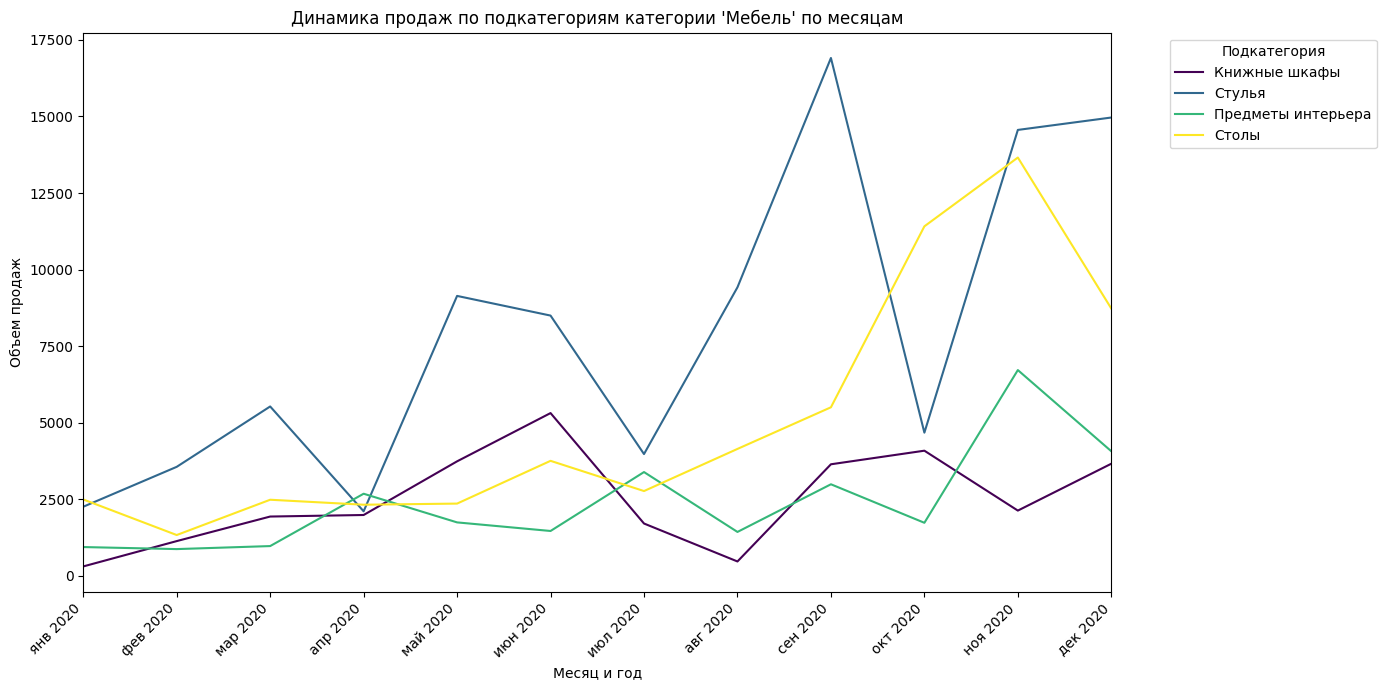

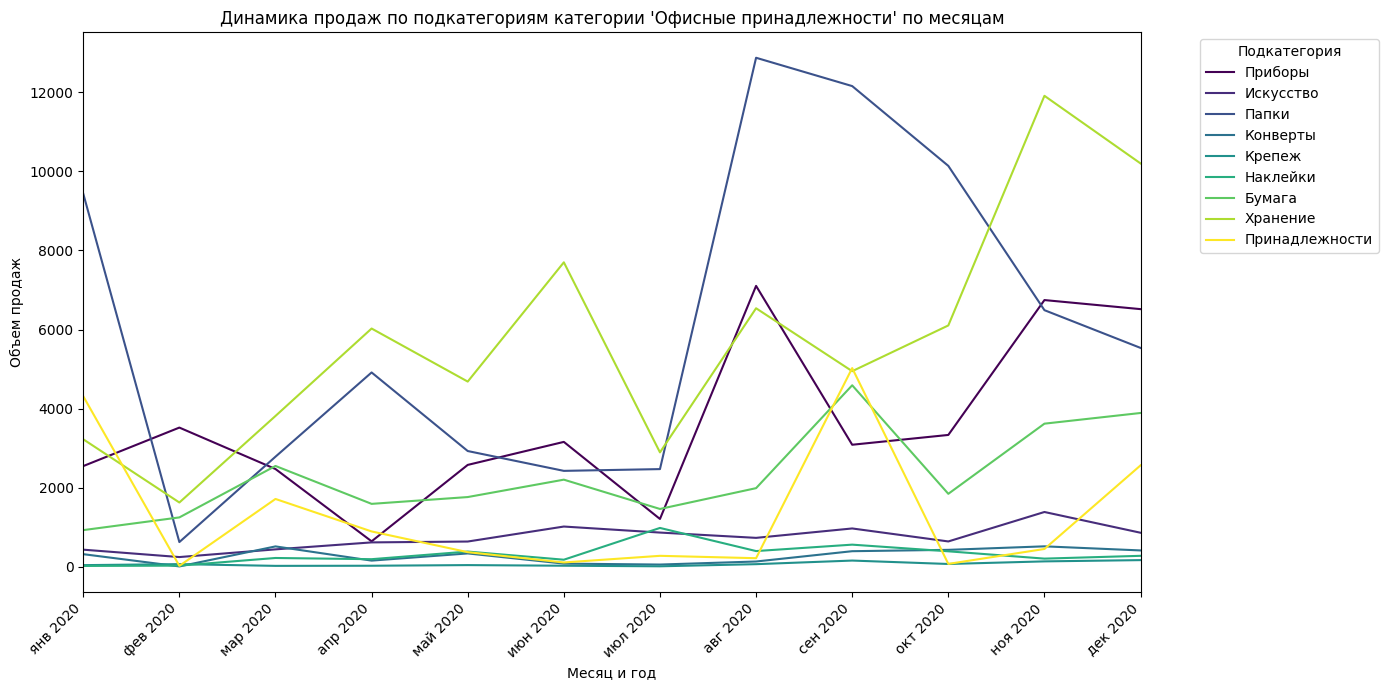

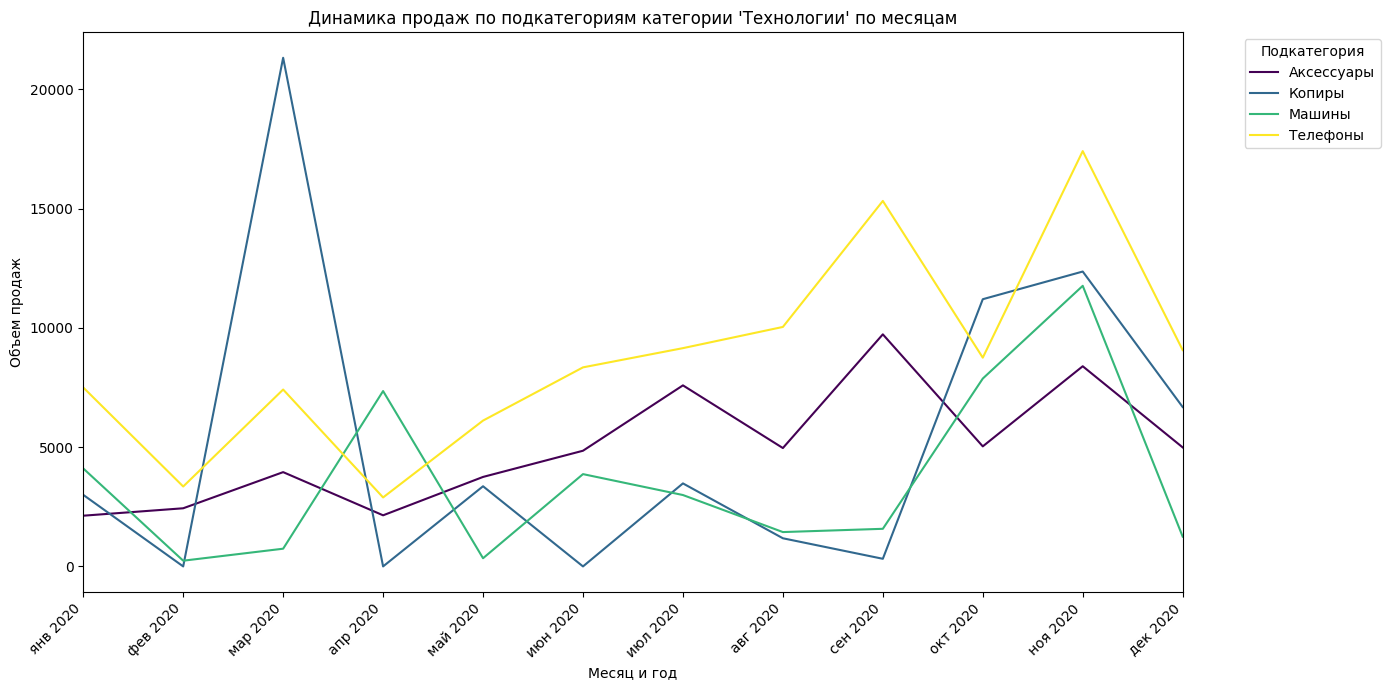

In [ ]:
# изучить динамику продаж внутри подкатегорий для каждой категории отдельно

# Получим список уникальных категорий
categories = df['category'].unique()

# Добавим перевод названий месяцев
ru_months = ['янв', 'фев', 'мар', 'апр', 'май', 'июн', 'июл', 'авг', 'сен', 'окт', 'ноя', 'дек']


for category in categories:
    # Отфильтруем данные для текущей категории
    df_category = df[df['category'] == category]

    # Сгруппируем данные по месяцу и году и подкатегории, затем просуммируем продажи
    sales_by_subcategory_over_time = df_category.groupby(['orderMonth', 'subCategory'])['sales'].sum().unstack(fill_value=0)

    plt.figure(figsize=(14, 7))
    ax = plt.gca()

    # Применяем перевод к названиям подкатегорий в столбцах для легенды
    translated_subcategory_columns = [subcategory_translation.get(subcat, subcat) for subcat in sales_by_subcategory_over_time.columns]
    sales_by_subcategory_over_time.columns = translated_subcategory_columns

    sales_by_subcategory_over_time.plot(ax=ax, colormap='viridis') # Используем другую палитру для подкатегорий для разнообразия

    # Добавим перевод названий месяцев
    months = sales_by_subcategory_over_time.index.to_timestamp()
    month_labels = [f"{ru_months[d.month-1]} {d.year}" for d in months]

    # Применяем перевод к названию категории для заголовка
    translated_category_title = category_translation.get(category, category)
    plt.xlabel("Месяц и год")
    plt.ylabel("Объем продаж")
    plt.title(f"Динамика продаж по подкатегориям категории '{translated_category_title}' по месяцам")
    plt.xticks(months, month_labels, rotation=45, ha='right') # Устанавливаем тики и метки с переводом
    plt.legend(title="Подкатегория", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

**Выводы по динамике продаж по категориям и подкатегориям:**

*   **По категориям:**
    *   Все категории демонстрируют общий рост продаж за 2020 год, с пиками в сентябре и ноябре.
    *   Категория "Технологии" показывает наиболее выраженный рост продаж, особенно в пиковые месяцы.
    *   Категории "Офисные принадлежности" и "Мебель" также растут, но менее динамично по сравнению с "Технологиями".

*   **По подкатегориям:**
    *   Общая тенденция: В большинстве подкатегорий наблюдается общий рост продаж к концу года, особенно в сентябре, ноябре и декабре, что соответствует общей сезонности продаж.
    *   Категория "Технологии":
        *   Подкатегории "Телефоны" и "Копиры" являются лидерами по объему продаж и демонстрируют сильный рост, особенно в пиковые месяцы.
        *   "Аксессуары" и "Машины" также показывают положительную динамику, но с меньшим объемом продаж.
    *   Категория "Офисные принадлежности":
        *   Подкатегории "Папки" и "Хранение" имеют наибольший объем продаж и стабильный рост.
        *   "Бумага", "Принадлежности", "Искусство", "Наклейки", "Конверты" и "Крепеж" имеют меньший объем продаж, и их динамика может быть более волатильной.
    *   Категория "Мебель":
        *   Подкатегории "Стулья" и "Столы" лидируют по объему продаж в этой категории и показывают уверенный рост.
        *   "Книжные шкафы" и "Предметы интерьера" имеют меньший объем продаж.
   

## Выводы по результатам исследования

На основе проведенного анализа данных о продажах на маркетплейсе Amazon за 2020 год, были получены следующие ключевые выводы:

**1. Общая активность и поведение покупателей:**
- В 2020 году наблюдался значительный объем продаж и большое количество уникальных заказов.
- Среднее число заказов на одного пользователя (2,4) указывает на высокую долю повторных покупок, что является позитивным фактором для бизнеса.

**2. Географическое распределение продаж:**
- Наибольшее количество уникальных заказов и максимальный объем продаж сосредоточены в регионе Запад.
- Среди штатов лидером по количеству заказов и объему продаж является Калифорния.
- Крупные города, такие как Нью-Йорк и Лос-Анджелес, вносят наибольший вклад в общий объем продаж.

**3. Динамика продаж и сезонность:**
- Продажи и количество заказов демонстрируют выраженную сезонность.
- Минимальные показатели зафиксированы в начале года (февраль).
- Пики продаж и количества заказов приходятся на осенние месяцы (сентябрь, ноябрь), что, вероятно, связано с предпраздничным сезоном и распродажами.
- Рост выручки в некоторые месяцы опережал рост числа заказов, что указывает на увеличение средней стоимости заказа.

**4. Распределение продаж по категориям и подкатегориям:**
- Категория "Технологии" лидирует по объему продаж.
- Категория "Офисные принадлежности" лидирует по количеству продаж (за счет товаров с низкой ценой и массовым спросом).
- Подкатегории "Телефоны" и "Копиры" являются лидерами по объему продаж в категории "Технологии".
- Подкатегории "Папки" и "Хранение" имеют наибольший объем продаж в категории "Офисные принадлежности".
- Подкатегории "Стулья" и "Столы" лидируют по объему продаж в категории "Мебель".

**5. Популярные товары:**
- Топ-10 самых популярных товаров по количеству проданных единиц составляют офисные расходники.
- Топ-10 товаров по сумме продаж включают более дорогостоящие позиции, преимущественно из категории "Технологии".

**6. Распределение категорий по локациям:**
- В большинстве крупных городов и штатов категория "Офисные принадлежности" занимает наибольшую долю в общем количестве заказов.
- Соотношение категорий "Технологии" и "Мебель" может варьироваться в зависимости от конкретной локации.

**7. Динамика продаж внутри категорий и подкатегорий:**
- Все категории показали общий рост продаж в течение года.
- Категория "Технологии" демонстрирует наиболее динамичный рост.
- Внутри подкатегорий также наблюдается рост, особенно в лидирующих позициях.


# Рекомендации
1. Сезонность:
   *  Капитализировать ноябрьский пик: заранее планировать акции, запасы и логистику к распродажам.
   *  Расширить сезонный маркетинг: стимулировать продажи в течение всего года.
2. География:
   *  Фокус на Западном регионе/Калифорнии: усилить маркетинг и предложения.
   *  Расширение: изучить и таргетировать другие регионы, адаптируя ассортимент.
3. Структура Продаж:
   *  Технологии (выручка): стимулировать продажи дорогих товаров (расширение ассортимента, реклама).
   *  Офисные принадлежности (заказы): Поощрять повторные покупки и оптовые заказы.
   *  Кросс-продажи: активно предлагать сопутствующие товары.
4. Лояльность Клиентов:
   *  Программы лояльности: внедрить для увеличения среднего числа заказов (с 2,4).
   *  Персонализация: использовать историю покупок для целевых предложений.
5. Дальнейший Рост:
   *  Непрерывный анализ: детально изучать поведение покупателей и конкурентов для дальнейшего устойчивого роста.